# Assignment 3: Autoregressive Moving Average Models

Tasks associated with this assignment are:
1. Load your dataset that you've been using in previous notebooks
2. Split your dataset into a training and test dataset
3. Fit the parameters of the following models to your training dataset:
    * AR(2)
    * ARMA(2,2)
4. Using the test portion of the dataset, compare the observations, AR(2), and ARMA(2,2) predictions for the following lead times:
    * 1 time period ahead
    * 3 time periods ahead
    * 5 time periods ahead
5. Characterize on the accuracy of the forecasts for each lead time and model
6. Comment on and contrast modeling approaches

### 1. Load in Arrowrock Reservoir Elevation dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as sm
from pandas.core import datetools

# Load the Arrowrock Reservoir Elevation dataset
df = pd.read_csv('ArrowrockReservoirElevation.csv', names=['Elevation','Y','M','D'], skiprows=1) #read in csv with Elevation data
df['SerDates'] = pd.to_datetime(df.Y*10000+df.M*100+df.D,format='%Y%m%d') #Define the datetime format

# Create a Water Year column for our pandas data frame. This is a pretty 
# simple thing to do, but may not be necessary if you're not dealing with
# discharge data. Here's how it goes:
# 1. Create an empty array that is full of zeros and equal in length to 
#    the number of days in the record
WY = np.zeros(len(df['Y'].index)) 
# 2. For those records where the month is less than 10, their associated 
#    year is the correct water year
WY[df['M'].values < 10] = df['Y'].values[df['M'].values < 10] 
# 3. For those records where the month is greater than or equal to 10, 
#    the correct water year is one more than the current calendar year
WY[df['M'].values >= 10] = df['Y'].values[df['M'].values >= 10] + 1
# 4. Save the water year array as a column in the pandas data frame, as an
#    integer
df['WY'] = WY.astype(int)

# Print the first and last 10 records just to make sure we loaded the data okay
qrows = np.concatenate([np.arange(0,10,1),np.arange(-11,-1,1)])
df.iloc[qrows,:]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  """


,Elevation,Y,M,D,SerDates,WY
0,3130.27,2006,10,1,2006-10-01,2007
1,3131.10,2006,10,2,2006-10-02,2007
2,3131.94,2006,10,3,2006-10-03,2007
3,3132.78,2006,10,4,2006-10-04,2007
4,3133.68,2006,10,5,2006-10-05,2007
5,3134.54,2006,10,6,2006-10-06,2007
6,3135.41,2006,10,7,2006-10-07,2007
7,3136.32,2006,10,8,2006-10-08,2007
8,3137.17,2006,10,9,2006-10-09,2007
9,3138.02,2006,10,10,2006-10-10,2007


### 2. Split dataset into a training and test dataset

In [4]:
# Divide data in to a training dataset, all non 2015 years, and a test dataset, all 2015 data
df_train = df[df.WY != 2015]
df_test  = df[df.WY == 2015]

### 3. Fit the parameters of the following models to your training dataset:
* AR(2)
* ARMA(2,2)

In [6]:
Et = pd.Series(df_train['Elevation'].values,df_train['SerDates'].values)
E_AR2_model = sm.AR(Et).fit(2)
print(E_AR2_model.params)

const    2.858975
L1.y     1.943585
L2.y    -0.944485
dtype: float64


In [8]:
E_ARMA_2_2_model = sm.ARMA(Et-np.mean(Et),(2,2)).fit()
print(E_ARMA_2_2_model.params)

const     -3.585367
ar.L1.y    1.895974
ar.L2.y   -0.896867
ma.L1.y    0.414353
ma.L2.y    0.071559
dtype: float64


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### 4. Using the test portion of the dataset, compare the observations, AR(2), and ARMA(2,2) predictions for the following lead times:
* 1 time period ahead
* 3 time periods ahead
* 5 time periods ahead

#### 1 time period ahead

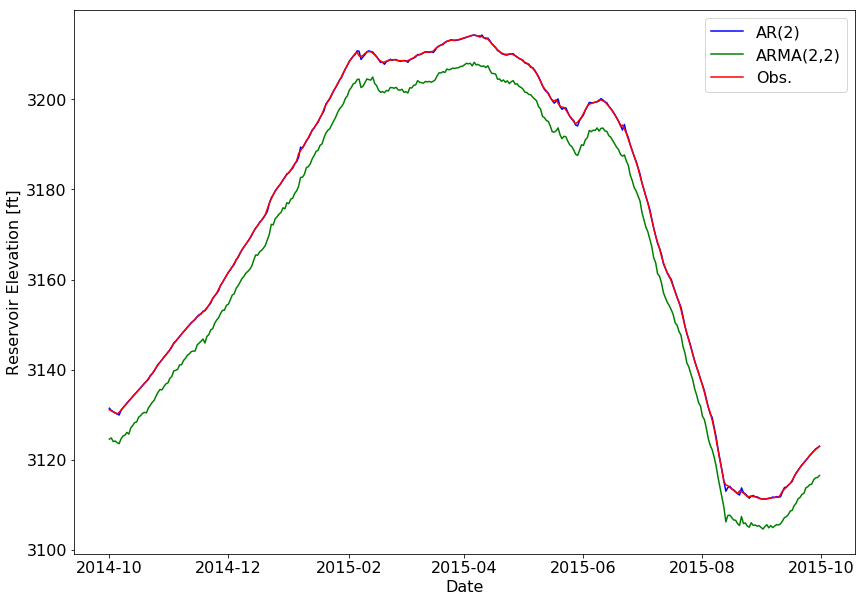

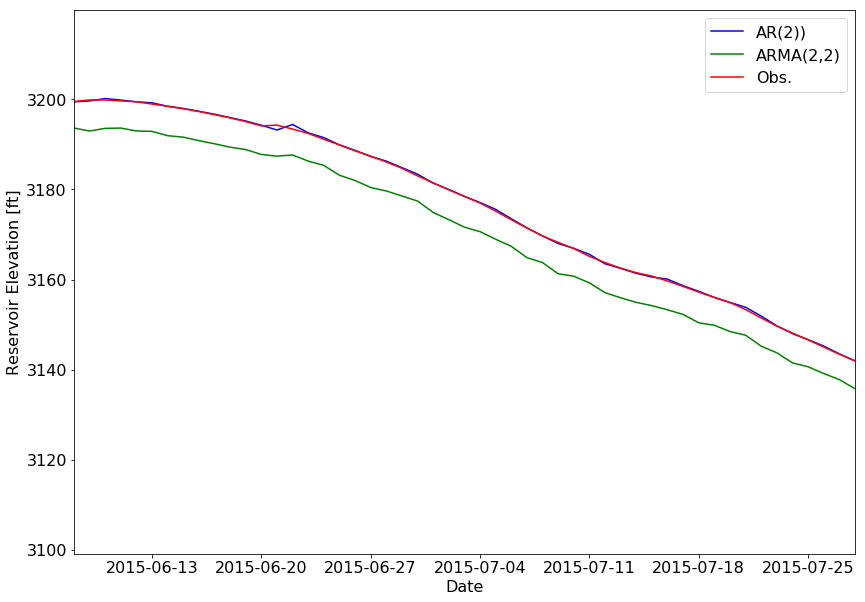

In [15]:
noise_std =0.654

Etrain = df_train['Elevation'].values
Etrain = Etrain.reshape(Etrain.size,1)

Etest  = df_test['Elevation'].values
Etest  = Etest.reshape(Etest.size,1)

DatesTest = df_test['SerDates'].values

Ettm1 = np.concatenate([Etrain[-2:-1],Etest[0:-1]])
Ettm1 = Ettm1.reshape(Ettm1.size,1)

Ettm2 = np.concatenate([Etrain[-3:-1],Etest[0:-2]])
Ettm2 = Ettm2.reshape(Ettm2.size,1)

etatm1 = np.random.normal(0.0,noise_std,(len(Ettm1),1))
etatm2 = np.concatenate([np.random.normal(0.0,noise_std,(2,1)),etatm1[0:-2]])

AR2_mu   = E_AR2_model.params[0]
AR2_phi1 = E_AR2_model.params[1]
AR2_phi2 = E_AR2_model.params[2]

EhatAR2 = AR2_mu + AR2_phi1*Ettm1 + AR2_phi2*Ettm2

ARMA22_mu     = E_ARMA_2_2_model.params[0]
ARMA22_phi1   = E_ARMA_2_2_model.params[1]
ARMA22_phi2   = E_ARMA_2_2_model.params[2]
ARMA22_theta1 = E_ARMA_2_2_model.params[3]
ARMA22_theta2 = E_ARMA_2_2_model.params[4]

EhatARMA22 = ARMA22_mu + ARMA22_phi1*Ettm1 + ARMA22_phi2*Ettm2 - ARMA22_theta1*etatm1 - ARMA22_theta2*etatm2

plt.figure(figsize=(14,10))

plt.plot(DatesTest,EhatAR2,'b-')
plt.plot(DatesTest,EhatARMA22,'g-')
plt.plot(DatesTest,Etest,'r-')
plt.ylabel('Reservoir Elevation [ft]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.legend(('AR(2)','ARMA(2,2)','Obs.'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

plt.figure(figsize=(14,10))
plt.plot(DatesTest,EhatAR2,'b-')
plt.plot(DatesTest,EhatARMA22,'g-')
plt.plot(DatesTest,Etest,'r-')
plt.xlim([DatesTest[250],DatesTest[300]])
plt.ylabel('Reservoir Elevation [ft]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.legend(('AR(2))','ARMA(2,2)','Obs.'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()